In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

mnist_train_path = 'train.csv'
mnist_test_path = 'test.csv'

mnist_train_df = pd.read_csv(mnist_train_path, header=None).T
mnist_test_df = pd.read_csv(mnist_test_path, header=None).T
last_column = mnist_test_df.columns[-1]
mnist_train_df.rename(columns={last_column:'Class'}, inplace=True)
mnist_test_df.rename(columns={last_column:'Class'}, inplace=True)

In [3]:
mnist_train_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Class
24212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
24213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
24214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
24215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
24216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [4]:
mnist_train_df.shape

(24217, 785)

In [5]:
index_0s = mnist_train_df['Class'] == 0
index_1s = mnist_train_df['Class'] == 1
index_3s = mnist_train_df['Class'] == 3
index_5s = mnist_train_df['Class'] == 5

mnist_train_0_1_df = mnist_train_df.loc[index_0s | index_1s]
mnist_train_3_5_df = mnist_train_df.loc[index_3s | index_5s]

In [6]:
index_0s = mnist_test_df['Class'] == 0
index_1s = mnist_test_df['Class'] == 1
index_3s = mnist_test_df['Class'] == 3
index_5s = mnist_test_df['Class'] == 5

mnist_test_0_1_df = mnist_test_df.loc[index_0s | index_1s]
mnist_test_3_5_df = mnist_test_df.loc[index_3s | index_5s]

In [7]:
mnist_train_0_1_df.shape

(12665, 785)

In [8]:
mnist_train_0_1_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Class
12660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
data_train_0_1=mnist_train_0_1_df.as_matrix()
data_train_3_5=mnist_train_3_5_df.as_matrix()
data_test_0_1=mnist_test_0_1_df.as_matrix()
data_test_3_5=mnist_test_3_5_df.as_matrix()

In [10]:
data_train_0_1[:,0:784].shape

(12665, 784)

In [11]:
X_train_0_1=data_train_0_1[:,0:784]
Y_train_0_1=data_train_0_1[:,784]
X_test_0_1=data_test_0_1[:,0:784]
Y_test_0_1=data_test_0_1[:,784]

In [12]:
X_train_3_5=data_train_3_5[:,0:784]
Y_train_3_5=data_train_3_5[:,784]
X_test_3_5=data_test_3_5[:,0:784]
Y_test_3_5=data_test_3_5[:,784]

In [13]:
max(Y_train_3_5)

5.0

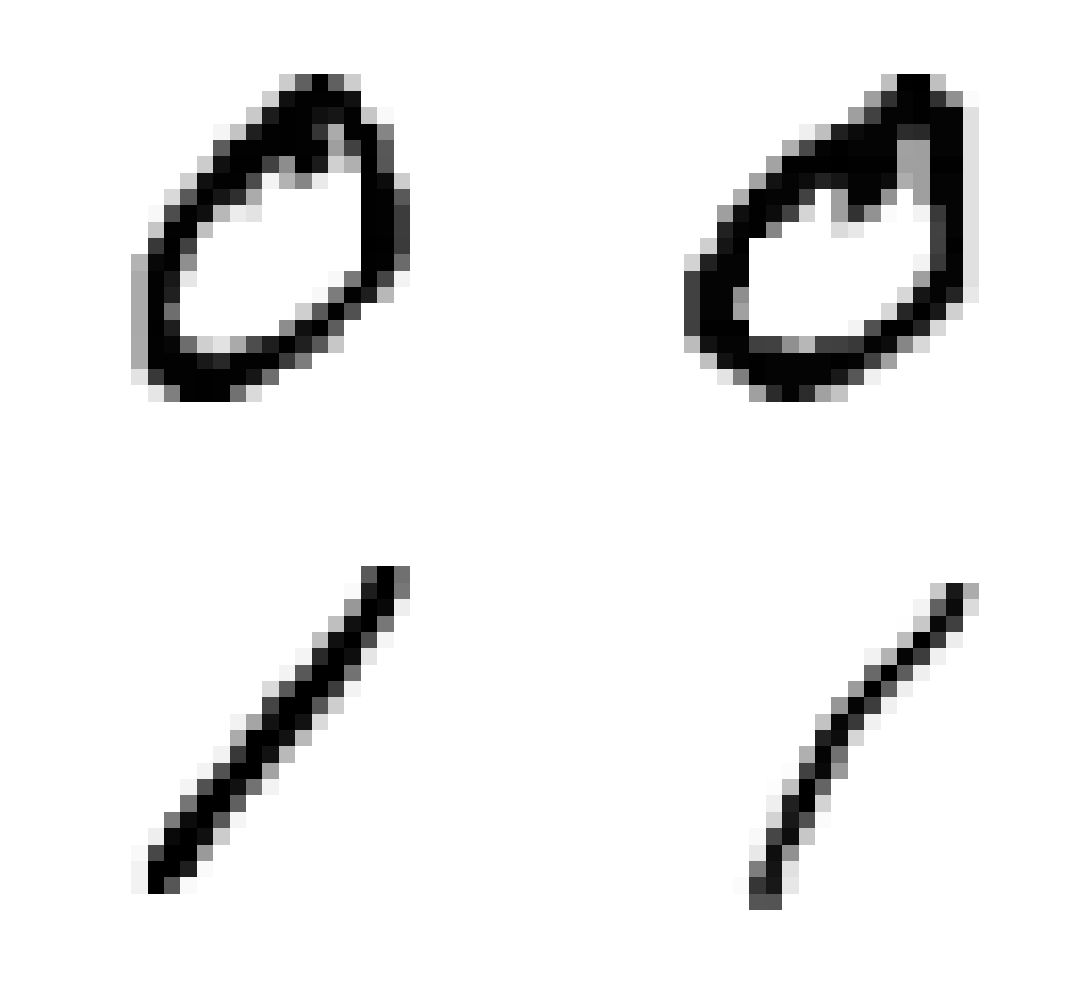

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
numbers = [0,1,12663,12664]
for i in range(4):
    example = X_train_0_1[numbers[i]].reshape(28, 28).T
    plt.subplot(2, 2, i+1)
    plt.imshow(example, cmap='gray_r', interpolation='nearest')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [15]:
cov_0_1=np.cov((X_train_0_1).T)
cov_3_5=np.cov((X_train_3_5).T)

In [16]:
cov_0_1.shape

(784, 784)

In [17]:
from numpy import linalg as LA
eig_val_0_1, eig_vec_0_1 = LA.eig(cov_0_1)
eig_val_3_5, eig_vec_3_5 = LA.eig(cov_3_5)

In [18]:
eig_vec_0_1=np.real(eig_vec_0_1)
eig_vec_3_5=np.real(eig_vec_3_5)
eig_val_0_1=np.real(eig_val_0_1)
eig_val_3_5=np.real(eig_val_3_5)

In [19]:
eig_vec_0_1.shape

(784, 784)

In [20]:
sorted_eig_val_0_1=np.sort(eig_val_0_1)[::-1]
index_sorted_eig_val_0_1=np.argsort(eig_val_0_1)[::-1]
sorted_eig_val_3_5=np.sort(eig_val_3_5)[::-1]
index_sorted_eig_val_3_5=np.argsort(eig_val_3_5)[::-1]

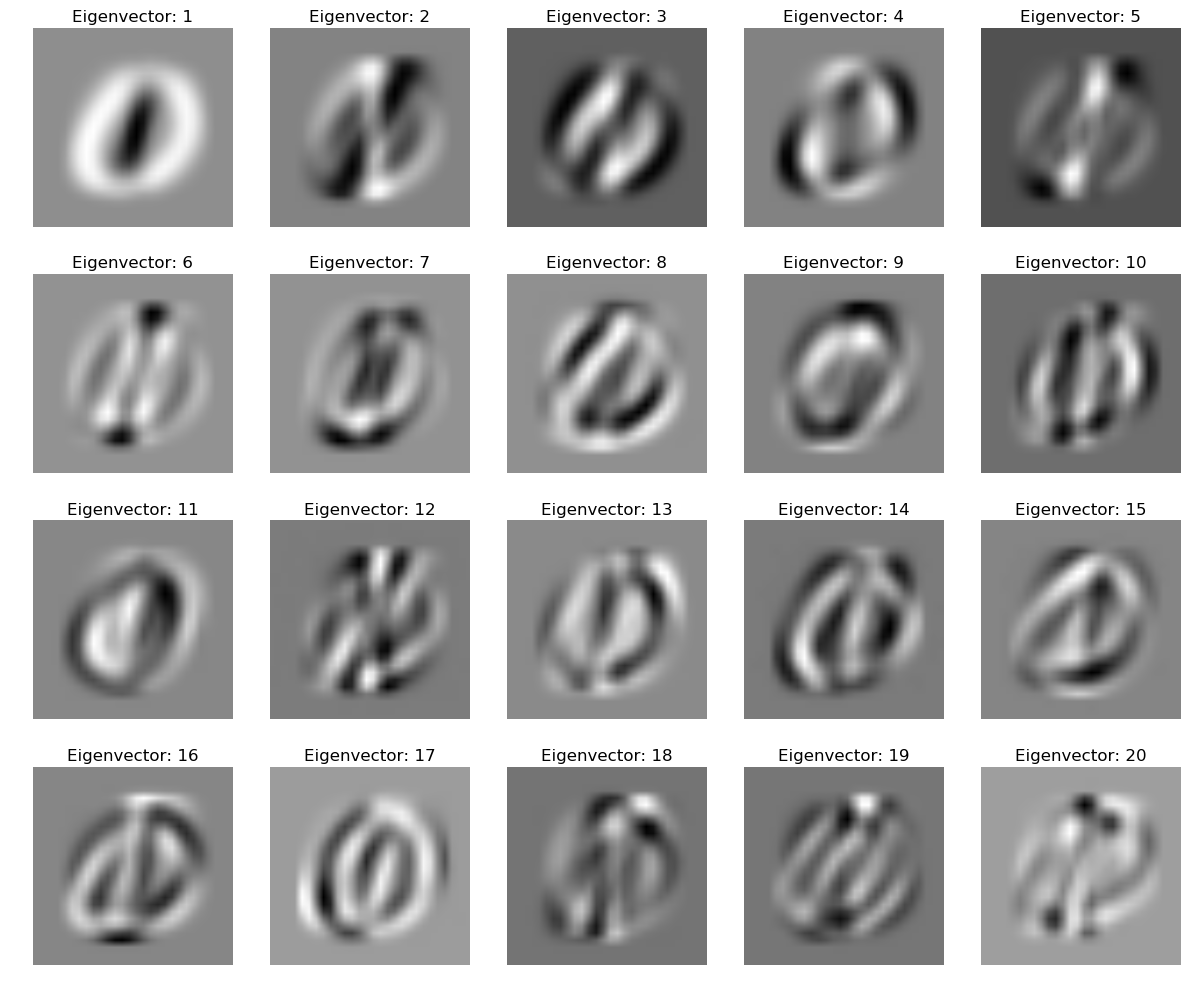

In [21]:
plt.figure(figsize=(12,10))
for i in range(20):
    example = eig_vec_0_1[:,index_sorted_eig_val_0_1[i]].reshape(28, 28).T
    plt.subplot(4, 5, i+1)
    plt.imshow(example, cmap='gray')
    plt.title("Eigenvector: {0}".format(i+1))
    plt.axis("off")
plt.tight_layout()
plt.show()

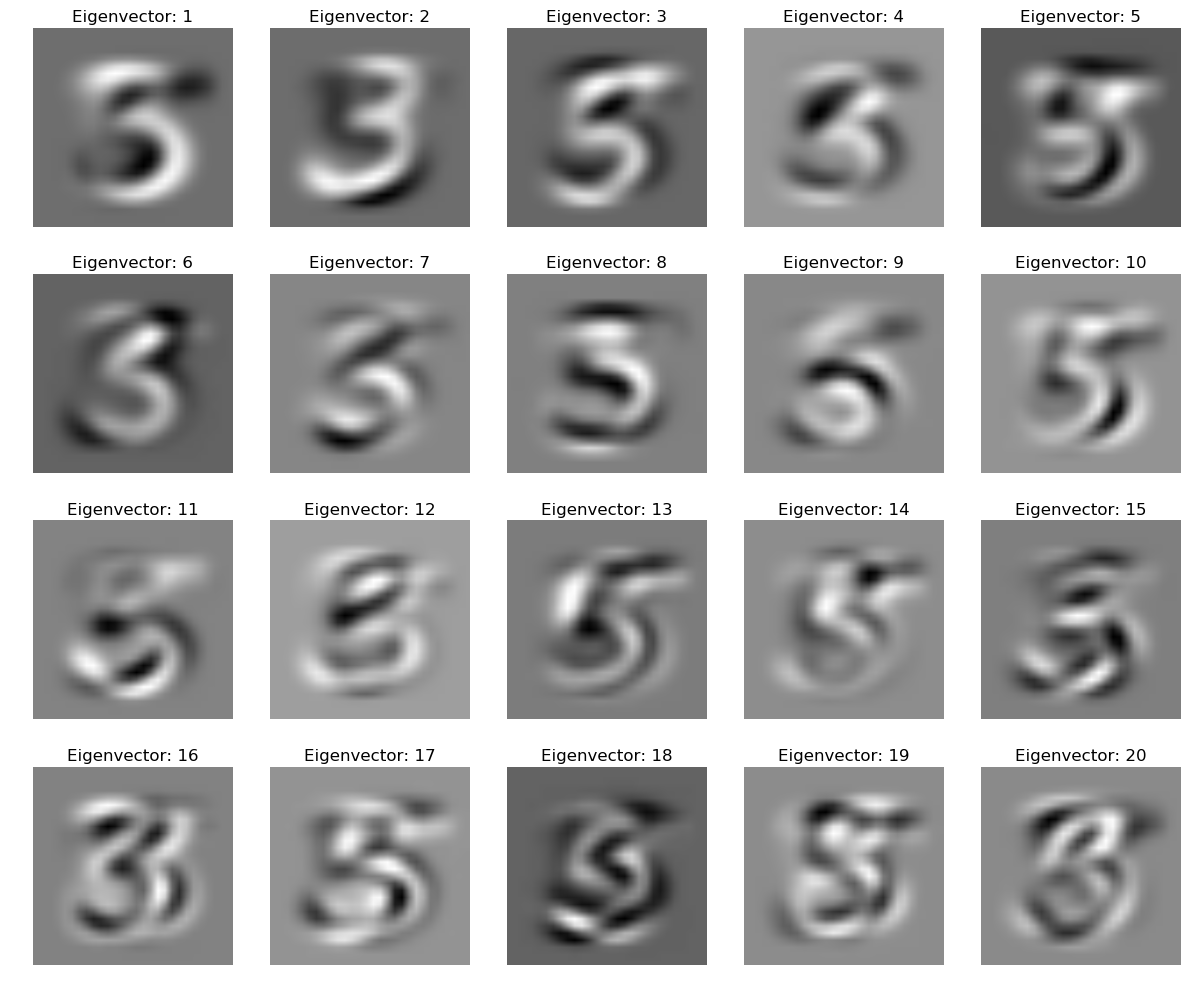

In [22]:
plt.figure(figsize=(12,10))
for i in range(20):
    example = eig_vec_3_5[:,index_sorted_eig_val_3_5[i]].reshape(28, 28).T
    plt.subplot(4, 5, i+1)
    plt.imshow(example, cmap='gray')
    plt.title("Eigenvector: {0}".format(i+1))
    plt.axis("off")
plt.tight_layout()
plt.show()

In [23]:
cumilative_sorted_eig_val_0_1=np.cumsum(sorted_eig_val_0_1)
norm_cumilative_sorted_eig_val_0_1=cumilative_sorted_eig_val_0_1/(max(cumilative_sorted_eig_val_0_1))

In [24]:
cumilative_sorted_eig_val_3_5=np.cumsum(sorted_eig_val_3_5)
norm_cumilative_sorted_eig_val_3_5=cumilative_sorted_eig_val_3_5/(max(cumilative_sorted_eig_val_3_5))

In [25]:
norm_cumilative_sorted_eig_val_0_1

array([ 0.32080447,  0.41140557,  0.49224049,  0.54775654,  0.58681503,
        0.62070727,  0.64416534,  0.66489196,  0.6827601 ,  0.69834488,
        0.7129231 ,  0.72610343,  0.73762686,  0.74879602,  0.75956825,
        0.76903753,  0.77744603,  0.78530194,  0.79276865,  0.79990708,
        0.80653071,  0.81255337,  0.81831085,  0.8240194 ,  0.82950032,
        0.83471177,  0.83958219,  0.84388408,  0.84814201,  0.85182877,
        0.85550096,  0.85891468,  0.86223048,  0.86547597,  0.86856912,
        0.87156707,  0.87446955,  0.87729715,  0.88004685,  0.88264545,
        0.88514193,  0.8875095 ,  0.88973149,  0.89188645,  0.89393861,
        0.89592719,  0.89789173,  0.89979756,  0.90164015,  0.90339344,
        0.90511933,  0.9067279 ,  0.90830576,  0.90982514,  0.91129955,
        0.91273963,  0.91414198,  0.91552113,  0.91688341,  0.91821523,
        0.91950714,  0.92075728,  0.92198097,  0.92317226,  0.92429769,
        0.92541281,  0.92647554,  0.92751592,  0.92854737,  0.92

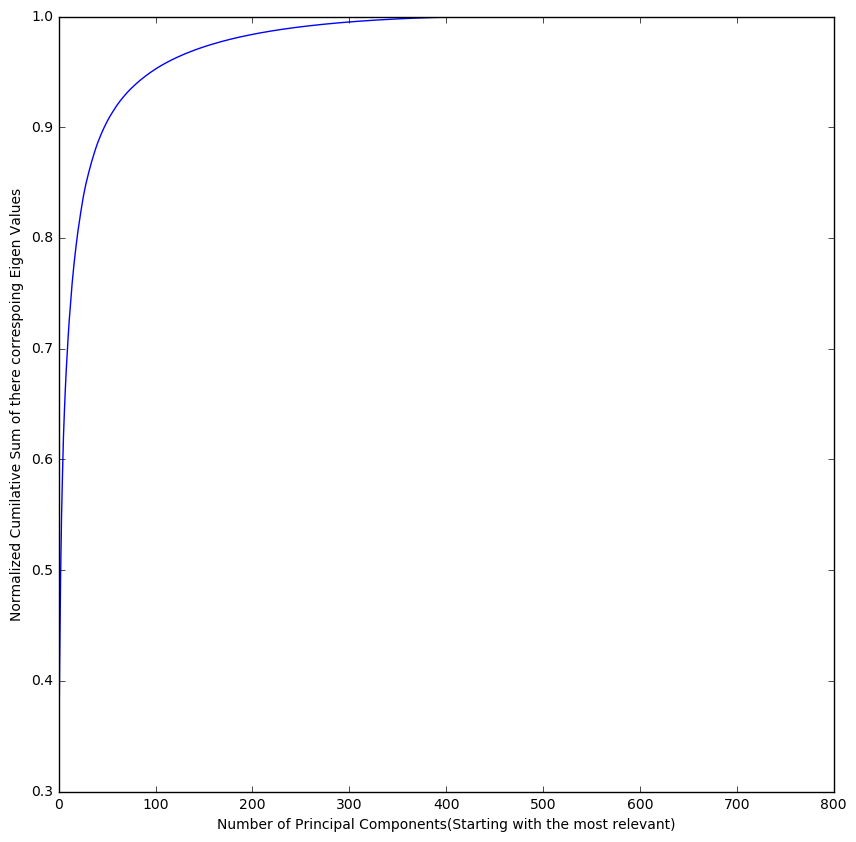

In [26]:
plt.figure(figsize=(10,10))
plt.plot(range(len(norm_cumilative_sorted_eig_val_0_1)), norm_cumilative_sorted_eig_val_0_1)
plt.xlabel('Number of Principal Components(Starting with the most relevant)')
plt.ylabel('Normalized Cumilative Sum of there correspoing Eigen Values')
plt.show()

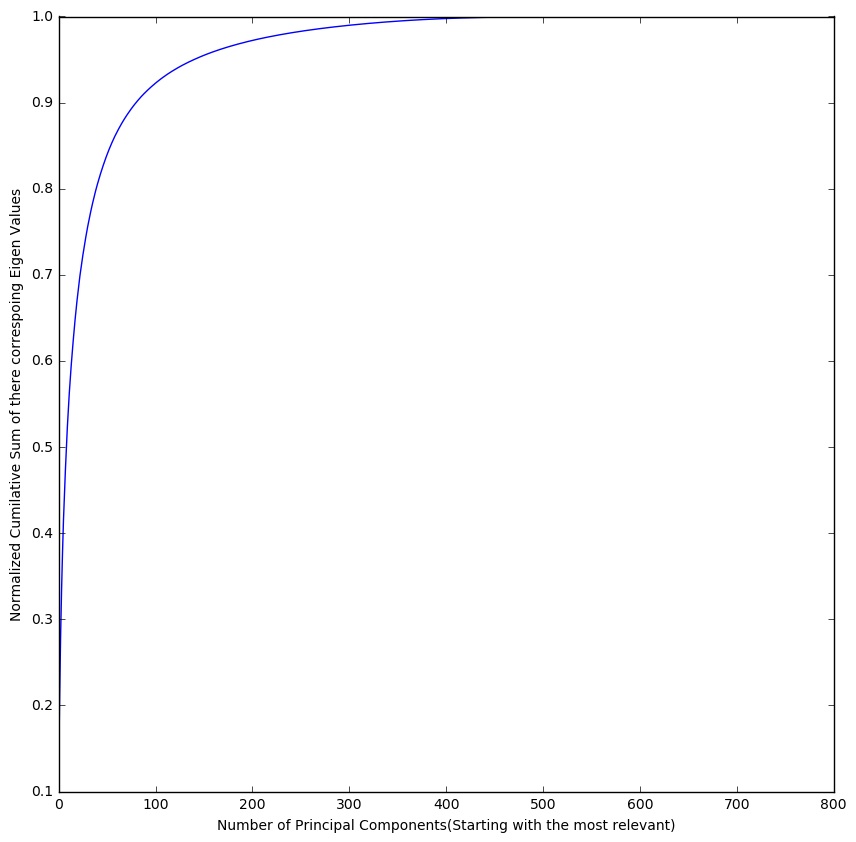

In [27]:
plt.figure(figsize=(10,10))
plt.plot(range(len(norm_cumilative_sorted_eig_val_3_5)), norm_cumilative_sorted_eig_val_3_5)
plt.xlabel('Number of Principal Components(Starting with the most relevant)')
plt.ylabel('Normalized Cumilative Sum of there correspoing Eigen Values')
plt.show()

In [28]:
pca_components_0_1=eig_vec_0_1[:,index_sorted_eig_val_0_1[0]]
for i in range(len(eig_val_0_1)-1):
    pca_components_0_1=np.column_stack((pca_components_0_1,eig_vec_0_1[:,index_sorted_eig_val_0_1[i+1]]))

In [29]:
pca_components_3_5=eig_vec_3_5[:,index_sorted_eig_val_3_5[0]]
for i in range(len(eig_val_3_5)-1):
    pca_components_3_5=np.column_stack((pca_components_3_5,eig_vec_3_5[:,index_sorted_eig_val_3_5[i+1]]))

In [30]:
pca_components_3_5.shape

(784, 784)

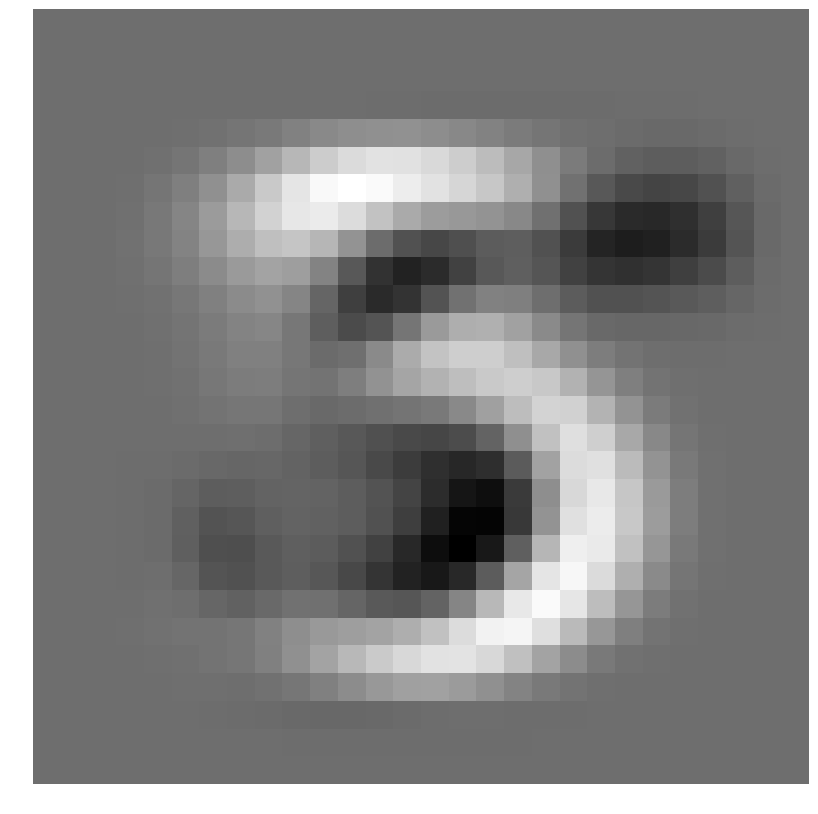

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(pca_components_3_5[:,0].reshape(28, 28).T, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.show()

In [32]:
X_train_0_1_mean=(X_train_0_1.T).mean(1)

In [33]:
X_train_0_1_mean.shape

(784,)

In [34]:
reconstructions_0_1 = []
error_reconstructions_0_1=[]
test_example_0_1= X_test_0_1[0,:]
adjusted_test_example_0_1=(X_test_0_1[0,:]-X_train_0_1_mean)
n = 150
for i in range(1,n+1):
    projection = adjusted_test_example_0_1.dot(pca_components_0_1[:,0:i])
    reconstruction = projection.dot(pca_components_0_1[:,0:i].T)+X_train_0_1_mean
    error_reconstruction=sum((X_test_0_1[0,:]-reconstruction)**2)
    error_reconstructions_0_1.append(error_reconstruction)
    reconstructions_0_1.append(reconstruction)

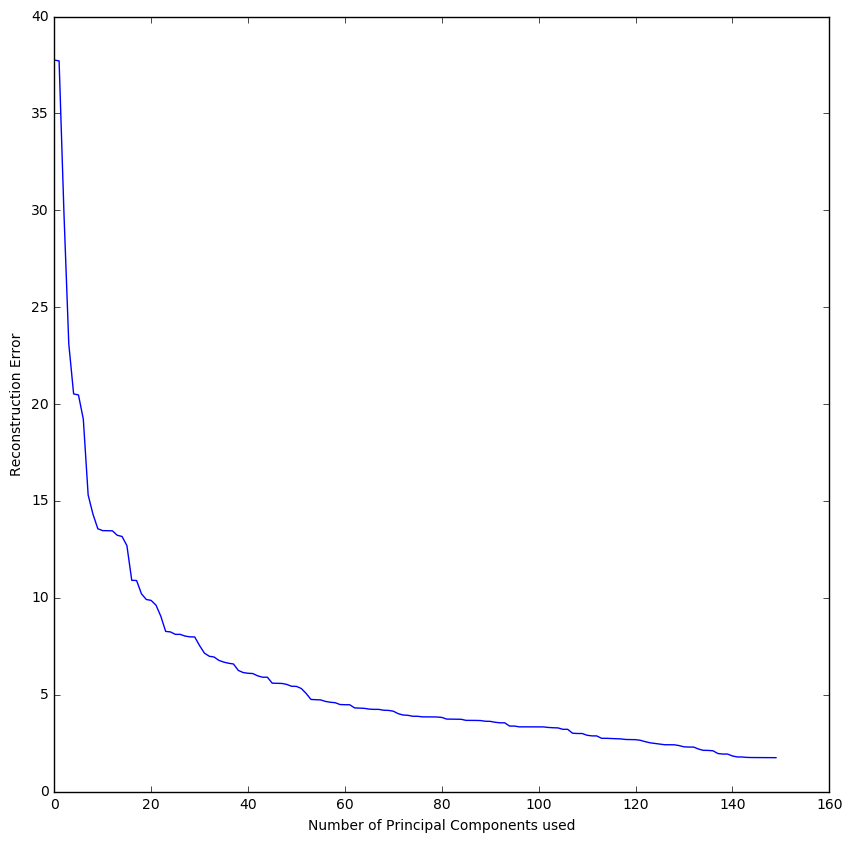

In [35]:
plt.figure(figsize=(10,10))
plt.plot(range(150), error_reconstructions_0_1)
plt.xlabel('Number of Principal Components used')
plt.ylabel('Reconstruction Error')
plt.show()

In [36]:
error_reconstructions_0_1=[]
n = 150
for i in range(n):
    temp=sorted_eig_val_0_1
    error=sum(temp[i+1:])
    error_reconstructions_0_1.append(error)

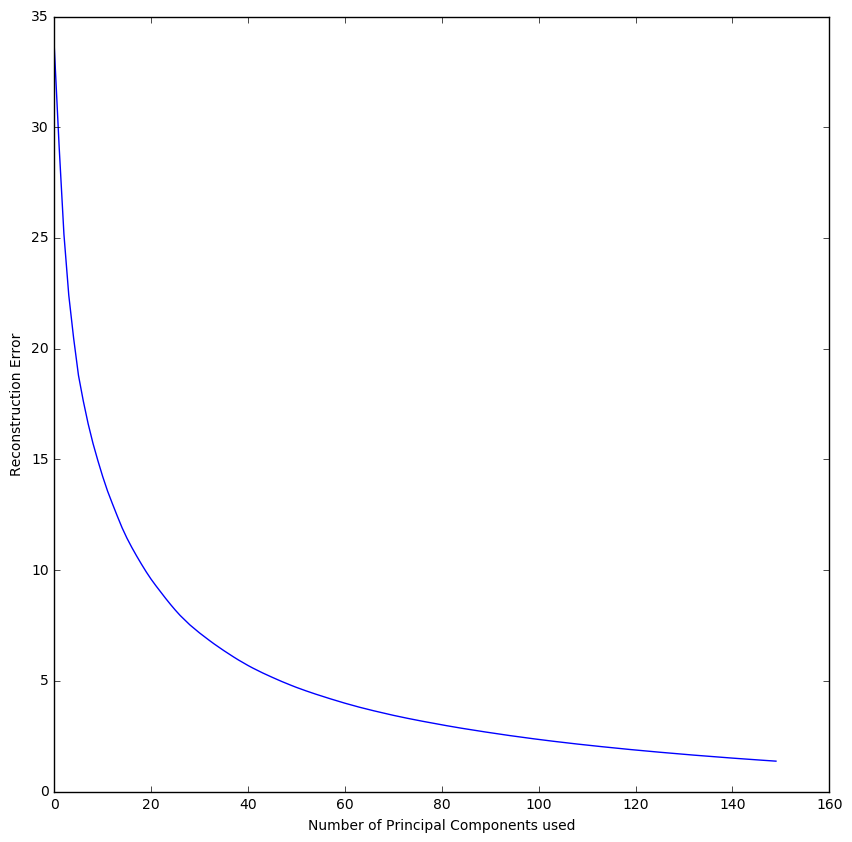

In [37]:
plt.figure(figsize=(10,10))
plt.plot(range(150), error_reconstructions_0_1)
plt.xlabel('Number of Principal Components used')
plt.ylabel('Reconstruction Error')
plt.show()

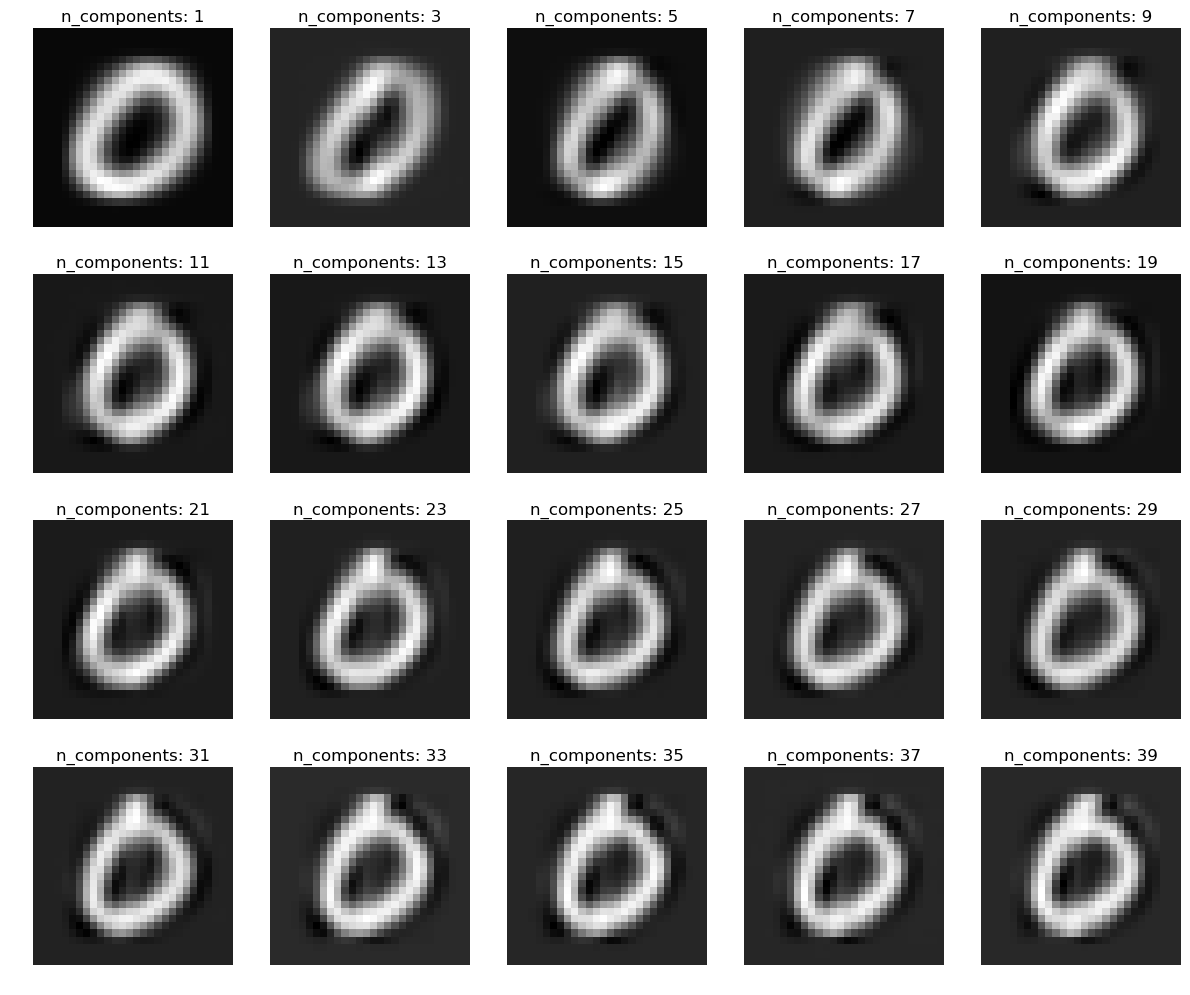

In [38]:
plt.figure(figsize=(12,10))
j=0
for i in range(20):
    example = reconstructions_0_1[i*2].reshape(28, 28).T
    plt.subplot(4, 5, j+1)
    plt.imshow(example, cmap='gray', interpolation='nearest')
    plt.title("n_components: {0}".format(i*2+1))
    plt.axis("off")
    j=j+1
plt.tight_layout()
plt.show()

In [39]:
reconstructions_3_5 = []
error_reconstructions_3_5=[]
X_train_3_5_mean=(X_train_3_5.T).mean(1)
test_example_3_5= X_test_3_5[0,:]
adjusted_test_example_3_5=(X_test_3_5[0,:]-X_train_3_5_mean)
n = 150
for i in range(1,n+1):
    projection = adjusted_test_example_3_5.dot(pca_components_3_5[:,0:i])
    reconstruction = projection.dot(pca_components_3_5[:,0:i].T)+X_train_3_5_mean
    error_reconstruction=sum((X_test_3_5[0,:]-reconstruction)**2)
    error_reconstructions_3_5.append(error_reconstruction)
    reconstructions_3_5.append(reconstruction)

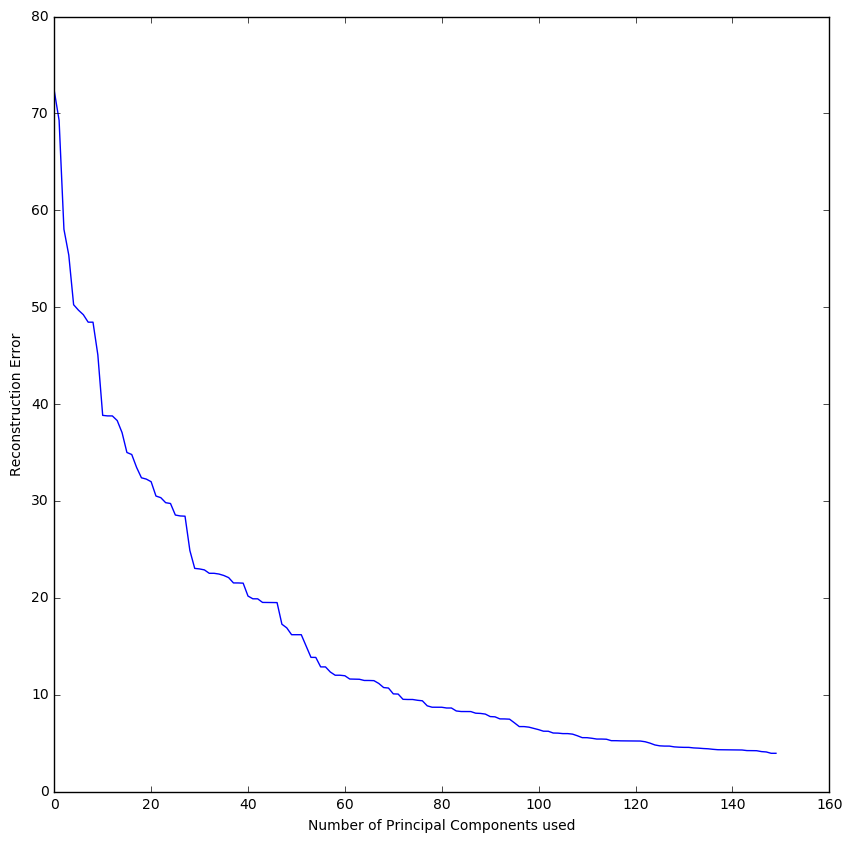

In [40]:
plt.figure(figsize=(10,10))
plt.plot(range(150), error_reconstructions_3_5)
plt.xlabel('Number of Principal Components used')
plt.ylabel('Reconstruction Error')
plt.show()

In [41]:
error_reconstructions_3_5=[]
n = 150
for i in range(n):
    temp=sorted_eig_val_3_5
    error=sum(temp[i+1:])
    error_reconstructions_3_5.append(error)

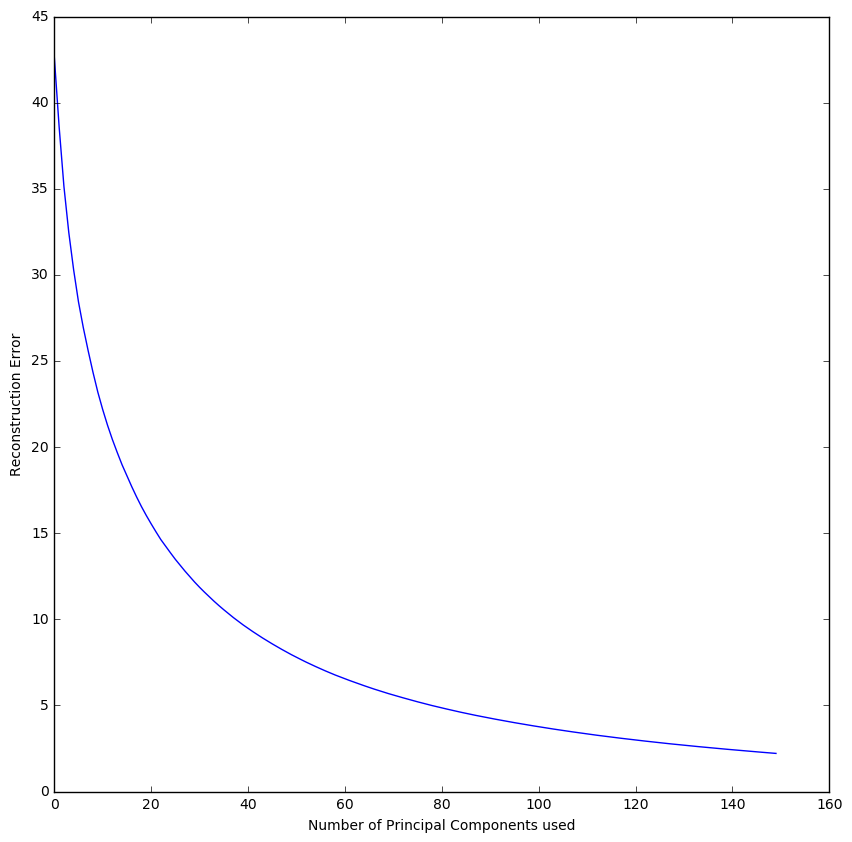

In [42]:
plt.figure(figsize=(10,10))
plt.plot(range(150), error_reconstructions_3_5)
plt.xlabel('Number of Principal Components used')
plt.ylabel('Reconstruction Error')
plt.show()

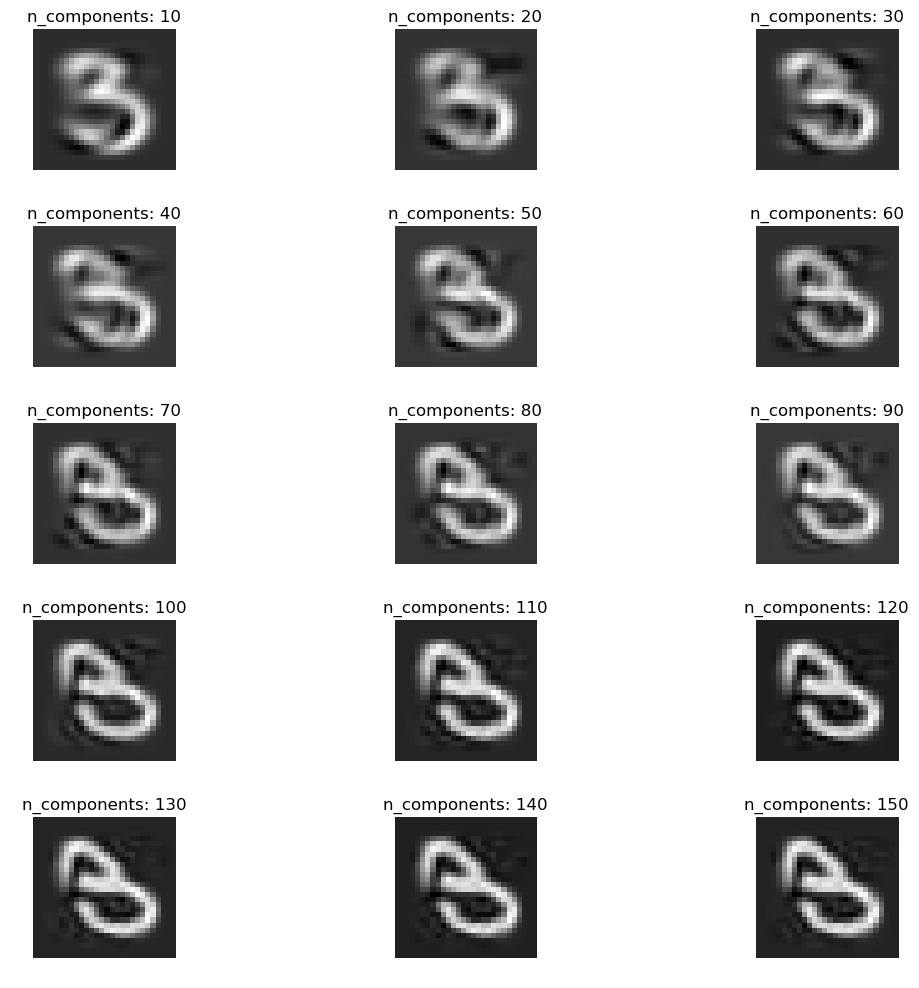

In [43]:
plt.figure(figsize=(12,10))
j=0
for i in range(10,151,10):
    example = reconstructions_3_5[i-1].reshape(28, 28).T
    plt.subplot(5, 3, j+1)
    plt.imshow(example, cmap='gray', interpolation='nearest')
    plt.title("n_components: {0}".format(i))
    plt.axis("off")
    j=j+1
plt.tight_layout()
plt.show()

In [44]:
len(X_train_0_1)

12665

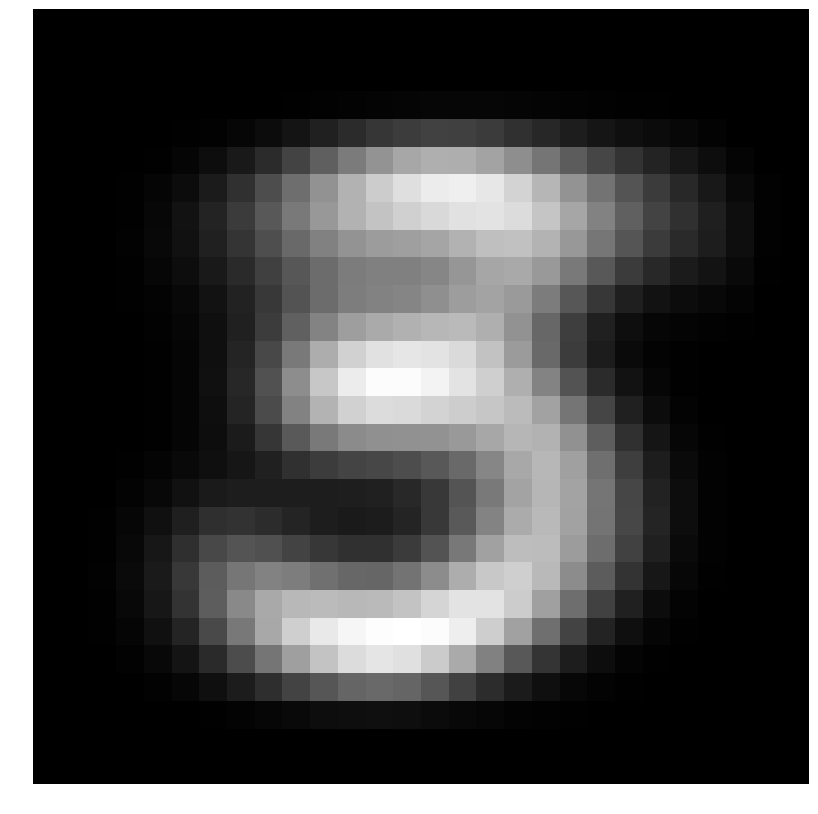

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(X_train_3_5_mean.reshape(28, 28).T, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.show()

In [46]:
#number_of_PCA_components
n=50;
temp=np.array([(X_train_0_1[i,:].T-X_train_0_1_mean) for i in range(len(X_train_0_1))])

                                                                                                           

In [47]:
temp.shape

(12665, 784)

In [48]:
X_train_0_1_classifier=temp.dot(pca_components_0_1[:,0:n])

In [49]:
X_train_0_1_classifier.shape

(12665, 50)

In [50]:
temp=np.array([(X_train_3_5[i,:].T-X_train_3_5_mean) for i in range(len(X_train_3_5))])
X_train_3_5_classifier=temp.dot(pca_components_3_5[:,0:n])


In [51]:
X_train_3_5_classifier.shape

(11552, 50)

In [52]:
X_test_0_1_mean=(X_test_0_1.T).mean(1)
temp=np.array([(X_test_0_1[i,:].T-X_test_0_1_mean) for i in range(len(X_test_0_1))])
X_test_0_1_classifier=temp.dot(pca_components_0_1[:,0:n])

In [53]:
X_test_0_1_classifier.shape

(2115, 50)

In [54]:
X_test_3_5_mean=(X_test_3_5.T).mean(1)
temp=np.array([(X_test_3_5[i,:].T-X_test_3_5_mean) for i in range(len(X_test_3_5))])
X_test_3_5_classifier=temp.dot(pca_components_3_5[:,0:n])

In [55]:
X_test_3_5_classifier.shape

(1902, 50)

In [56]:
Y_train_0_1.shape

(12665,)

In [57]:
Y_train_01 = np.reshape(Y_train_0_1,(len(Y_train_0_1),1))
print(Y_train_01.shape)
data_train_01 = np.hstack((Y_train_01, X_train_0_1_classifier))
print(data_train_01.shape)

(12665, 1)
(12665, 51)


In [58]:
Y_train_35 = np.reshape(Y_train_3_5,(len(Y_train_3_5),1))
print(Y_train_35.shape)
data_train_35 = np.hstack((Y_train_35, X_train_3_5_classifier))
print(data_train_35.shape)

(11552, 1)
(11552, 51)


In [59]:
Y_test_01 = np.reshape(Y_test_0_1,(len(Y_test_0_1),1))
print(Y_test_01.shape)
data_test_01 = np.hstack((Y_test_01, X_test_0_1_classifier))
print(data_test_01.shape)

(2115, 1)
(2115, 51)


In [60]:
Y_test_35 = np.reshape(Y_test_3_5,(len(Y_test_3_5),1))
print(Y_test_35.shape)
data_test_35 = np.hstack((Y_test_35, X_test_3_5_classifier))
print(data_test_35.shape)

(1902, 1)
(1902, 51)


In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
import csv
import random
import math
import statistics
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix
import pylab as pl
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools

In [65]:
def calculatePrior(dataset, labels):
    label = labels[1]
    total = len(dataset)
    X = np.asarray(dataset)
    X = X[:,:1]
    X = X.flatten()
    X = X.tolist()
    prior = X.count(float(label))
    prior = prior/total
    return prior

In [66]:
def doStandardScaling(dataset):
    dataset = np.asarray(dataset)
    labels  = dataset[:,:1]
    features = dataset[:,1:]
    X_r = pd.DataFrame(StandardScaler().fit_transform(features))
    X=np.append(labels,X_r, axis = 1)
    data = X.tolist()
    return data

In [67]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[0] not in separated):
            separated[vector[0]] = []
        separated[vector[0]].append(vector)
    return separated

In [68]:
def varianceFeatures(dataset):
    var = []
    for attribute in zip(*dataset):
        var.append(statistics.variance(attribute))
    del var[0]
    return var

In [69]:
def meanFeatures(dataset):
    meanFeatures = [(statistics.mean(attribute)) for attribute in zip(*dataset)]
    del meanFeatures[0]
    return meanFeatures

In [70]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    meanFeaturesClass = {}
    for classValue, instances in separated.items():
        meanFeaturesClass[classValue] = meanFeatures(instances)  
    return meanFeaturesClass

In [71]:
def calculateWeights(mean, variance, labels):
    weights = []
    for index in range (len(variance)):
        weights.append((mean[labels[0]][index] - mean[labels[1]][index])/(1 + variance[index]))
    return weights

In [72]:
def calculateWeightZero(prior, mean, variance, labels):
    weightZero = math.log((1-prior)/prior)
    for i in range(len(variance)):
        weightZero = weightZero + ((mean[labels[0]][i]*mean[labels[0]][i] - mean[labels[1]][i]*mean[labels[1]][i])/(1 + 2*variance[i]))
    return weightZero

In [73]:
def calculatePosteriorProbabilities(weight0, weights, inputVector, labels):
    prob = {}
    prob[labels[0]] = []
    prob[labels[1]] = []
    numerator = 0
    for i in range(len(weights)):
        numerator = numerator +  weights[i]*inputVector[i+1]
    num = math.exp(weight0 + numerator)
    prob[labels[0]].append((num/(1+num)))
    prob[labels[1]].append(1/(1+num))    
    return prob

In [74]:
def predict(weight0, weights, inputVector, labels):
    probs = calculatePosteriorProbabilities(weight0, weights, inputVector, labels)
    bestLabel, bestProb = None, -1
    for label, p in probs.items():
        if bestLabel is None or p > bestProb:
            bestProb = p
            bestLabel = label
    return bestLabel

In [75]:
def getPredictions(weight0, weights, testSet, labels):
    predictions = []
    for i in range(len(testSet)):
        result = predict(weight0, weights, testSet[i], labels)
        predictions.append(result)
    return predictions

In [76]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][0] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [77]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 

Using MNIST dataset
50
Accuracy score for 0|1
99.90543735224587
Confusion matrix
[[ 978    2]
 [   0 1135]]


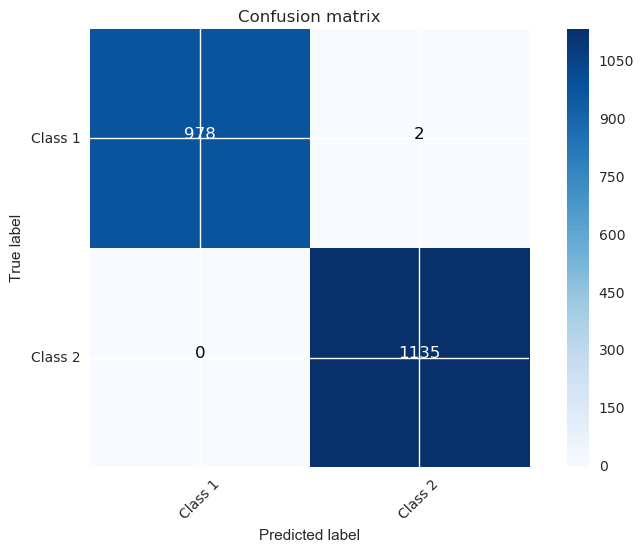

Accuracy score for 3|5
96.267087276551
Confusion matrix
[[977  33]
 [ 38 854]]


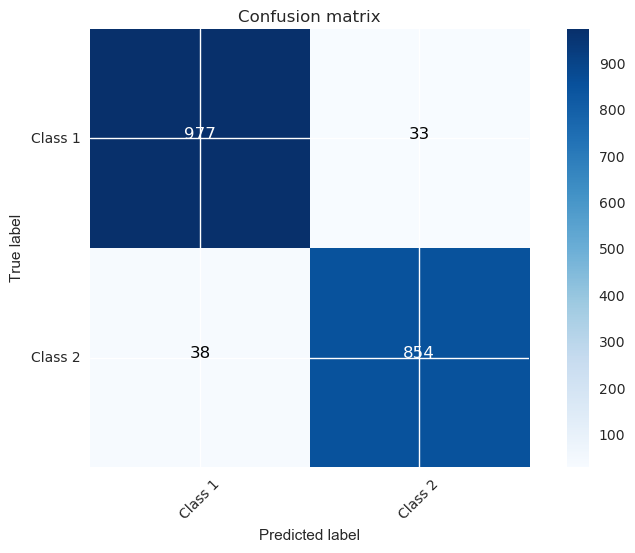

In [79]:
print('Using MNIST dataset')

labels = [0,1]
trainingSet = data_train_01   

testSet = data_test_01
          
summaries = summarizeByClass(trainingSet)
var = varianceFeatures(trainingSet)
print(len(var))
prior = calculatePrior(trainingSet, labels)
weights = calculateWeights(summaries, var, labels)

weight0 = calculateWeightZero(prior, summaries, var , labels)
predictions = getPredictions(weight0, weights, testSet, labels)
accuracy1 = getAccuracy(testSet, predictions)
print('Accuracy score for 0|1')
print(accuracy1)

Y = np.asarray(testSet)
Y = Y[:,:1]
Y_test = Y.tolist()
accuracy = confusion_matrix(Y_test,predictions)
classes = ['Class 1', 'Class 2']
plt.figure()
plot_confusion_matrix(accuracy, classes=classes,title='Confusion matrix')
plt.show()


        

trainingSet = data_train_35
labels = [3,5]

trainingSet = doStandardScaling(trainingSet)
        
testSet = data_test_35
testSet = doStandardScaling(testSet)
    
    
# prepare model
summaries = summarizeByClass(trainingSet)
var = varianceFeatures(trainingSet)
prior = calculatePrior(trainingSet, labels)
weights = calculateWeights(summaries, var, labels)
weight0 = calculateWeightZero(prior, summaries, var , labels)
predictions = getPredictions(weight0, weights, testSet, labels)
accuracy1 = getAccuracy(testSet, predictions)
print('Accuracy score for 3|5')
print(accuracy1)
    
    
Y = np.asarray(testSet)
Y = Y[:,:1]
Y_test = Y.tolist()
accuracy = confusion_matrix(Y_test,predictions)
classes = ['Class 1', 'Class 2']
plt.figure()
plot_confusion_matrix(accuracy, classes=classes,title='Confusion matrix')
plt.show()